In [3]:
import numpy as np
import pandas as pd

# **Linear Regression**
*Linear regression is a statistical method used to model and analyze the relationships between a dependent variable and one or more independent variables. The goal of linear regression is to find the best-fitting straight line (or hyperplane in higher dimensions) through the data points that minimizes the discrepancy between the observed and predicted values*.



Estimated coefficients: [4.21509616] [[2.77011339]]


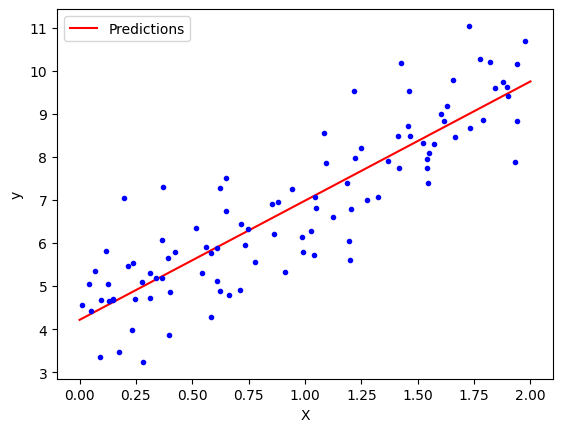

In [ ]:
#Sample Code for Simple Linear Regression

from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Generate some sample data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Create and train the model
lin_reg = LinearRegression()
lin_reg.fit(X, y)

print("Estimated coefficients:", lin_reg.intercept_, lin_reg.coef_)

# Predict
X_new = np.array([[0], [2]])
y_predict = lin_reg.predict(X_new)

# Plot the results
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [4]:
df = pd.read_csv("Preprocessed_cleaned_Final_dataset.csv")

In [ ]:
df.head()

,Text,IsHatespeech,tokens,clean_text,text_length
0,frustratingly small please find an image at le...,0,"['frustratingly', 'small', 'please', 'find', '...",frustratingly small please find image least pi...,117
1,padding cell padding class mainpagebg solid ve...,0,"['padding', 'cell', 'padding', 'class', 'mainp...",padding cell padding class mainpagebg solid ve...,1192
2,from the scenarios you present i see you belie...,0,"['scenario', 'present', 'see', 'believe', 'peo...",scenario present see believe people robot abra...,560
3,i have to go inside you tomorrow i hate myself...,0,"['go', 'inside', 'tomorrow', 'hate', 'every', ...",go inside tomorrow hate every time feel cheap ...,51
4,retweet china s bird flu outbreak good signs b...,0,"['retweet', 'china', 'bird', 'flu', 'outbreak'...",retweet china bird flu outbreak good sign bad ...,59


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9310 entries, 0 to 9309
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Text          9310 non-null   object
 1   IsHatespeech  9310 non-null   int64 
 2   tokens        9310 non-null   object
 3   clean_text    9307 non-null   object
 4   text_length   9310 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 363.8+ KB


In [ ]:
df.describe()

,IsHatespeech,text_length
count,9310.000000,9310.000000
mean,0.489903,130.067240
std,0.499925,158.588118
min,0.000000,0.000000
25%,0.000000,41.000000
50%,0.000000,73.000000
75%,1.000000,149.000000
max,1.000000,1436.000000


In [ ]:
df['IsHatespeech'].value_counts()

IsHatespeech
0    4749
1    4561
Name: count, dtype: int64

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'df' is your DataFrame with 'clean_text' and 'IsHatespeech' columns

df['clean_text'] = df['clean_text'].fillna('')

# Create the vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the data
tfidf_matrix = vectorizer.fit_transform(df["clean_text"])
x = tfidf_matrix

# Convert the labels to numerical using LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['IsHatespeech'])

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
regressor = LinearRegression()

# Train the model
regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 84.52529952543499
R-squared: -337.1047088069739


In [19]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score

# Assuming 'df' is your DataFrame with 'clean_text' and 'IsHatespeech' columns

df['clean_text'] = df['clean_text'].fillna('')

# Create the vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the data
tfidf_matrix = vectorizer.fit_transform(df["clean_text"])
x = tfidf_matrix

# Convert the labels to numerical using LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['IsHatespeech'])

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create an SVM classifier
svm_classifier = SVC(kernel='linear') # You can experiment with different kernels like 'rbf', 'poly'

# Train the model
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7943071965628357


# **SVM**

*Support Vector Machine (SVM) is a supervised learning algorithm used primarily for classification tasks but also for regression and outlier detection. It works by finding the hyperplane that best separates different classes in the feature space. SVM seeks to maximize the margin between data points of different classes, ensuring that the closest points, known as support vectors, are as far from the hyperplane as possible. This margin maximization helps SVM achieve robust generalization on unseen data. SVM can handle both linear and non-linear classification by using kernel functions to transform the input space, allowing it to tackle complex problems by mapping them into higher-dimensional spaces.*

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score

# Assuming 'df' is your DataFrame with 'clean_text' and 'IsHatespeech' columns

df['clean_text'] = df['clean_text'].fillna('')

# Create the vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the data
tfidf_matrix = vectorizer.fit_transform(df["clean_text"])
x = tfidf_matrix

# Convert the labels to numerical using LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['IsHatespeech'])

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

# Train the model
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6847475832438239


# **Decision Tree**
*A Decision Tree is a versatile supervised learning algorithm used for both classification and regression tasks. It works by recursively splitting the data into subsets based on the value of the most significant features, forming a tree-like model of decisions and their possible consequences. Each internal node represents a "test" on a feature, each branch represents the outcome of the test, and each leaf node represents a class label or a regression value. The paths from root to leaf represent classification rules. Decision Trees are intuitive, easy to interpret, and can handle both numerical and categorical data. However, they are prone to overfitting, especially with complex trees, but this can be mitigated through techniques like pruning or using ensemble methods such as Random Forests.*

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score



df['clean_text'] = df['clean_text'].fillna('')

# Create the vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the data
tfidf_matrix = vectorizer.fit_transform(df["clean_text"])
x = tfidf_matrix

# Convert the labels to numerical using LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['IsHatespeech'])

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7508055853920516


# **Random Forest**

*Random Forest is an ensemble learning method that combines multiple decision trees to improve classification, regression, and other tasks. By constructing a "forest" of decision trees, each trained on a random subset of the data and features, Random Forest reduces the variance and combats overfitting that can affect individual decision trees. During prediction, each tree votes for a class (in classification) or provides a value (in regression), and the final output is determined by aggregating these votes or averaging the values. This approach enhances the model’s robustness and accuracy, making Random Forests effective for handling complex, high-dimensional datasets and providing insights into feature importance.*

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score



df['clean_text'] = df['clean_text'].fillna('')

# Create the vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the data
tfidf_matrix = vectorizer.fit_transform(df["clean_text"])
x = tfidf_matrix

# Convert the labels to numerical using LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['IsHatespeech'])

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create a Logistic Regression model
logreg_classifier = LogisticRegression()

# Train the model
logreg_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7921589688506981


# **Logistic Regression**

*Logistic Regression is a statistical model used for binary classification tasks, where the outcome is a binary variable (i.e., it has two possible outcomes). It estimates the probability that a given input belongs to a particular class using a logistic (sigmoid) function to map predictions to probabilities. Unlike linear regression, which predicts a continuous output, logistic regression predicts the probability of the target variable, making it suitable for cases where the dependent variable is categorical. The model calculates the log-odds (logit) of the outcome as a linear combination of the input features, and then applies the logistic function to derive the probability.*